---
# **Spotify Valence Analysis Final**
### ***Assignment II - Analytics Practicum I***
---
> Professor: Panos Louridas. <br />
> Student: Skoli Maria <br />
> AM: p2822131

---
# Introduction 
---

The aim of this assignment is to dissect Spotify's Valence metric.
Valence is a metric to measure the happiness of a track. It is measured with values between 0 and 1. Τhe closer a tracks' valence is to 1 means that someone feels happy. On the other side, closer to 0 means that someone feels sad.   

* The main goal of our analysis is to find the attributes that influence the `valence` of a track.

This assignment is divided into 4 sections: 

* **Data Crawling**
* **Explanatory models**
* **Predictive models**
* **Out-of-sample predictive ability**

We are going to describe each step of the above in detail in the next paragraphs.

---
# Section 1: Data Crawling 
---
## 1.1 Setting up the Spotify API 
---
First, in order to get access and analyse the features we will use the Spotify API. We created an app into Spotify Developers and got the `client_id` and the `client_secret` names that are necessary for the connection to be achieved. 

In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Necessary libraries to be imported
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import glob
import re
from datetime import datetime

import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Maria Skoli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Maria Skoli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
#We created the following Spotify client in order to have access to the Spotify data
client_id = 'fa2b812ebe4a450cb6b5d852c805be1a'
client_secret = '4a3732a509504082b4a961db114fdaf7'

client_credentials_manager = SpotifyClientCredentials(client_id,
                                                      client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## 1.2 Obtain the Data
---

* Now, we are going to download the data of two big playlists in order to conduct the analysis of the valence.
* We assured that the playlists had mixed kind songs and not only a specific kind. 
* Then, we extracted all features of the tracks using the Spotify API and we assigned them to a Dataframe.  

### 1st Playlist

In [4]:
#The link of the first playlist to download
playlist_link = "https://open.spotify.com/playlist/3p4KHmG61chj1P9sLKqQn4"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]

* Using the code below we extracted the ids of all the tracks in the playlist. 

In [5]:
# The parameters of the results_test are the username of the person who created the playlist
# and the Uri of the playlist 
results_test = sp.user_playlist_tracks('1171137446','3p4KHmG61chj1P9sLKqQn4')
tracks_test = results_test['items']

#We create an empty list for the ids 
ids = []
while results_test['next']:
    results_test = sp.next(results_test)
    tracks_test.extend(results_test['items'])

#We fill the ids list with tracks ids    
for i in tracks_test:
    ids.append(i["track"]["id"])

* Then we will use the list with the tracks ids and using the spotify function `sp.audio_features` we will extract all audio features (including valence) for each song. 

In [6]:
#We create an empty features in order to store all the tracks features 
features = {}
start = 0
num_tracks = 100

#Spotify can not extract more than 100 tracks per time, so that the reason of the loop
while start < len(ids):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = ids[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks


getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200
getting from 1200 to 1300
getting from 1300 to 1400
getting from 1400 to 1500
getting from 1500 to 1600
getting from 1600 to 1700
getting from 1700 to 1800
getting from 1800 to 1900
getting from 1900 to 2000
getting from 2000 to 2100
getting from 2100 to 2200
getting from 2200 to 2300
getting from 2300 to 2400
getting from 2400 to 2500
getting from 2500 to 2600
getting from 2600 to 2700
getting from 2700 to 2800
getting from 2800 to 2900
getting from 2900 to 3000
getting from 3000 to 3100
getting from 3100 to 3200
getting from 3200 to 3300
getting from 3300 to 3400
getting from 3400 to 3500
getting from 3500 to 3600
getting from 3600 to 3700
getting from 3700 to 3800
getting from 3800 to 3900
getting

* We obtained the features for `9931` tracks. 

In [7]:
#The total track features obtained
len(features)

9931

* Following the steps below we store the features data into a `dataframe`. 

In [8]:
df = pd.DataFrame(features)
#Reverse x and y axis
df2=df.swapaxes("index", "columns")
#Reset the index
df3=df2.reset_index()
#Rename the previous index as "Song_id"
df3=df3.rename(columns={'index': "Song_id"})
#print df3
df3

,Song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,2buUEhuN8I6tZ27kaWfqyh,0.49,0.445,8,-6.696,1,0.0545,0.276,0.000013,0.193,0.248,117.531,audio_features,2buUEhuN8I6tZ27kaWfqyh,spotify:track:2buUEhuN8I6tZ27kaWfqyh,https://api.spotify.com/v1/tracks/2buUEhuN8I6t...,https://api.spotify.com/v1/audio-analysis/2buU...,215266,4
1,39kzWAiVPpycdMpr745oPj,0.477,0.435,5,-6.497,1,0.0523,0.237,0,0.12,0.322,144.144,audio_features,39kzWAiVPpycdMpr745oPj,spotify:track:39kzWAiVPpycdMpr745oPj,https://api.spotify.com/v1/tracks/39kzWAiVPpyc...,https://api.spotify.com/v1/audio-analysis/39kz...,231202,4
2,7iKDsPfLT0d5mu2htfMKBZ,0.686,0.64,8,-5.491,1,0.159,0.0334,0,0.0801,0.597,162.225,audio_features,7iKDsPfLT0d5mu2htfMKBZ,spotify:track:7iKDsPfLT0d5mu2htfMKBZ,https://api.spotify.com/v1/tracks/7iKDsPfLT0d5...,https://api.spotify.com/v1/audio-analysis/7iKD...,171798,4
3,7qq0EOPW4RRlqdvMBmdd73,0.804,0.633,4,-6.186,1,0.0612,0.0371,0.000119,0.102,0.67,115.002,audio_features,7qq0EOPW4RRlqdvMBmdd73,spotify:track:7qq0EOPW4RRlqdvMBmdd73,https://api.spotify.com/v1/tracks/7qq0EOPW4RRl...,https://api.spotify.com/v1/audio-analysis/7qq0...,163946,4
4,4Ws314Ylb27BVsvlZOy30C,0.654,0.707,6,-5.661,1,0.0664,0.00559,0,0.0873,0.448,127.97,audio_features,4Ws314Ylb27BVsvlZOy30C,spotify:track:4Ws314Ylb27BVsvlZOy30C,https://api.spotify.com/v1/tracks/4Ws314Ylb27B...,https://api.spotify.com/v1/audio-analysis/4Ws3...,194765,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,0lPZumEzxNLBOklVCEyiA4,0.659,0.463,9,-8.422,1,0.143,0.229,0.00303,0.134,0.494,85.84,audio_features,0lPZumEzxNLBOklVCEyiA4,spotify:track:0lPZumEzxNLBOklVCEyiA4,https://api.spotify.com/v1/tracks/0lPZumEzxNLB...,https://api.spotify.com/v1/audio-analysis/0lPZ...,174555,4
9927,7pMLnEJrGpg7jx9Z0gyhiF,0.558,0.421,2,-7.138,1,0.0261,0.176,0,0.13,0.251,155.849,audio_features,7pMLnEJrGpg7jx9Z0gyhiF,spotify:track:7pMLnEJrGpg7jx9Z0gyhiF,https://api.spotify.com/v1/tracks/7pMLnEJrGpg7...,https://api.spotify.com/v1/audio-analysis/7pML...,190149,4
9928,4EWCNWgDS8707fNSZ1oaA5,0.79,0.647,10,-5.983,0,0.136,0.0515,0,0.248,0.654,87.999,audio_features,4EWCNWgDS8707fNSZ1oaA5,spotify:track:4EWCNWgDS8707fNSZ1oaA5,https://api.spotify.com/v1/tracks/4EWCNWgDS870...,https://api.spotify.com/v1/audio-analysis/4EWC...,211000,4
9929,2cdCC1aCXbvz9tXFOR6CxR,0.77,0.482,0,-9.796,0,0.0904,0.309,0.0824,0.0927,0.19,120.006,audio_features,2cdCC1aCXbvz9tXFOR6CxR,spotify:track:2cdCC1aCXbvz9tXFOR6CxR,https://api.spotify.com/v1/tracks/2cdCC1aCXbvz...,https://api.spotify.com/v1/audio-analysis/2cdC...,230040,4


### 2nd Playlist

* We follow exactly the same procedure as we discussed in the first playlist. 

In [9]:
#The link of the second playlist to download
playlist_link2 = "https://open.spotify.com/playlist/6bDwZdGNKBMjsx4yM99Q10"
playlist_URI2 = playlist_link.split("/")[-1].split("?")[0]

In [10]:
# The parameters of the results_test2 are the username of the person who created the playlist
# and the Uri of the playlist 
results_test2 = sp.user_playlist_tracks('onniojala33','3yoxWfSxA2Ff8Sr3jDVcw1')
tracks_test2 = results_test2['items']
#We create an empty list for the idss 
idss = []
while results_test2['next']:
    results_test2 = sp.next(results_test2)
    tracks_test2.extend(results_test2['items'])
#We fill the ids list with tracks idss
for i in tracks_test2:
    idss.append(i["track"]["id"])

In [11]:
#We create an empty features2 in order to store all the tracks features 
features2 = {}
start2 = 0
num_tracks2 = 100
while start2 < len(idss):
    print(f'getting from {start2} to {start2+num_tracks2}')
    tracks_batch2 = idss[start2:start2+num_tracks2]
    features_batch2 = sp.audio_features(tracks_batch2)
    features2.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch2, features_batch2) })
    start2 += num_tracks2

getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200
getting from 1200 to 1300
getting from 1300 to 1400
getting from 1400 to 1500
getting from 1500 to 1600
getting from 1600 to 1700
getting from 1700 to 1800
getting from 1800 to 1900
getting from 1900 to 2000
getting from 2000 to 2100
getting from 2100 to 2200
getting from 2200 to 2300
getting from 2300 to 2400
getting from 2400 to 2500
getting from 2500 to 2600
getting from 2600 to 2700
getting from 2700 to 2800
getting from 2800 to 2900
getting from 2900 to 3000
getting from 3000 to 3100
getting from 3100 to 3200
getting from 3200 to 3300
getting from 3300 to 3400
getting from 3400 to 3500
getting from 3500 to 3600
getting from 3600 to 3700
getting from 3700 to 3800
getting from 3800 to 3900
getting

* From the second playlist we obtained `9979` track features.

In [12]:
len(features2)

9979

* Following the steps below we store the features data into a `dataframe`.

In [13]:
dff = pd.DataFrame(features2)
#Reverse x and y axis
dff2=dff.swapaxes("index", "columns")
#Reset the index
dff3=dff2.reset_index()
#Rename the previous index as "Song_id"
dff3=dff3.rename(columns={'index': "Song_id"})
#print dff3
dff3

,Song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,6gPqBegU4aDWoSYXeCyURA,0.968,0.785,7,-8.084,0,0.32,0.464,0.000005,0.272,0.803,119.953,audio_features,6gPqBegU4aDWoSYXeCyURA,spotify:track:6gPqBegU4aDWoSYXeCyURA,https://api.spotify.com/v1/tracks/6gPqBegU4aDW...,https://api.spotify.com/v1/audio-analysis/6gPq...,220030,4
1,2vQ5HpRpn8S2qlrZbLsaFr,0.641,0.632,9,-7.464,0,0.0394,0.298,0,0.114,0.346,93.387,audio_features,2vQ5HpRpn8S2qlrZbLsaFr,spotify:track:2vQ5HpRpn8S2qlrZbLsaFr,https://api.spotify.com/v1/tracks/2vQ5HpRpn8S2...,https://api.spotify.com/v1/audio-analysis/2vQ5...,205055,4
2,5XeNoOXMfGmsAblFhskhrE,0.535,0.929,2,-4.026,1,0.0582,0.0431,0.602,0.1,0.144,112.422,audio_features,5XeNoOXMfGmsAblFhskhrE,spotify:track:5XeNoOXMfGmsAblFhskhrE,https://api.spotify.com/v1/tracks/5XeNoOXMfGms...,https://api.spotify.com/v1/audio-analysis/5XeN...,177167,1
3,0KoIrrbZr8rMXhFQK8T5Eg,0.366,0.871,9,-6.243,0,0.0823,0.0933,0.579,0.0693,0.19,149.745,audio_features,0KoIrrbZr8rMXhFQK8T5Eg,spotify:track:0KoIrrbZr8rMXhFQK8T5Eg,https://api.spotify.com/v1/tracks/0KoIrrbZr8rM...,https://api.spotify.com/v1/audio-analysis/0KoI...,183946,4
4,2jkoanGKXN9I3gfeYo4aph,0.268,0.867,10,-4.439,0,0.0922,0.0171,0,0.108,0.301,149.953,audio_features,2jkoanGKXN9I3gfeYo4aph,spotify:track:2jkoanGKXN9I3gfeYo4aph,https://api.spotify.com/v1/tracks/2jkoanGKXN9I...,https://api.spotify.com/v1/audio-analysis/2jko...,252800,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,7AQM6pTnDZfOXP7EIgBK3J,0.672,0.652,9,-4.356,0,0.0295,0.249,0,0.0388,0.576,122.995,audio_features,7AQM6pTnDZfOXP7EIgBK3J,spotify:track:7AQM6pTnDZfOXP7EIgBK3J,https://api.spotify.com/v1/tracks/7AQM6pTnDZfO...,https://api.spotify.com/v1/audio-analysis/7AQM...,278067,4
9975,730nlWb9Ts5yQ16hUT6Djg,0.422,0.747,11,-8.55,0,0.029,0.0696,0,0.102,0.631,163.213,audio_features,730nlWb9Ts5yQ16hUT6Djg,spotify:track:730nlWb9Ts5yQ16hUT6Djg,https://api.spotify.com/v1/tracks/730nlWb9Ts5y...,https://api.spotify.com/v1/audio-analysis/730n...,228160,4
9976,08DIrb3Z9k2N9ZCzmKKzdr,0.575,0.891,7,-3.988,1,0.0345,0.122,0.000003,0.525,0.611,96.042,audio_features,08DIrb3Z9k2N9ZCzmKKzdr,spotify:track:08DIrb3Z9k2N9ZCzmKKzdr,https://api.spotify.com/v1/tracks/08DIrb3Z9k2N...,https://api.spotify.com/v1/audio-analysis/08DI...,194760,4
9977,2EYbTXX1aB4UqRr1OKEB6u,0.41,0.465,6,-7.689,1,0.0274,0.782,0,0.161,0.425,88.376,audio_features,2EYbTXX1aB4UqRr1OKEB6u,spotify:track:2EYbTXX1aB4UqRr1OKEB6u,https://api.spotify.com/v1/tracks/2EYbTXX1aB4U...,https://api.spotify.com/v1/audio-analysis/2EYb...,218613,4



* We `merged` the two dataframes to obtain the final dataset for the analysis. 
* The final dataset contains 19.910 tracks and 19 attributes. 

In [14]:
MergedDf = dff3.append(df3)
MergedDf

C:\Users\MARIAS~1\AppData\Local\Temp/ipykernel_9528/947832098.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MergedDf = dff3.append(df3)


,Song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,6gPqBegU4aDWoSYXeCyURA,0.968,0.785,7,-8.084,0,0.32,0.464,0.000005,0.272,0.803,119.953,audio_features,6gPqBegU4aDWoSYXeCyURA,spotify:track:6gPqBegU4aDWoSYXeCyURA,https://api.spotify.com/v1/tracks/6gPqBegU4aDW...,https://api.spotify.com/v1/audio-analysis/6gPq...,220030,4
1,2vQ5HpRpn8S2qlrZbLsaFr,0.641,0.632,9,-7.464,0,0.0394,0.298,0,0.114,0.346,93.387,audio_features,2vQ5HpRpn8S2qlrZbLsaFr,spotify:track:2vQ5HpRpn8S2qlrZbLsaFr,https://api.spotify.com/v1/tracks/2vQ5HpRpn8S2...,https://api.spotify.com/v1/audio-analysis/2vQ5...,205055,4
2,5XeNoOXMfGmsAblFhskhrE,0.535,0.929,2,-4.026,1,0.0582,0.0431,0.602,0.1,0.144,112.422,audio_features,5XeNoOXMfGmsAblFhskhrE,spotify:track:5XeNoOXMfGmsAblFhskhrE,https://api.spotify.com/v1/tracks/5XeNoOXMfGms...,https://api.spotify.com/v1/audio-analysis/5XeN...,177167,1
3,0KoIrrbZr8rMXhFQK8T5Eg,0.366,0.871,9,-6.243,0,0.0823,0.0933,0.579,0.0693,0.19,149.745,audio_features,0KoIrrbZr8rMXhFQK8T5Eg,spotify:track:0KoIrrbZr8rMXhFQK8T5Eg,https://api.spotify.com/v1/tracks/0KoIrrbZr8rM...,https://api.spotify.com/v1/audio-analysis/0KoI...,183946,4
4,2jkoanGKXN9I3gfeYo4aph,0.268,0.867,10,-4.439,0,0.0922,0.0171,0,0.108,0.301,149.953,audio_features,2jkoanGKXN9I3gfeYo4aph,spotify:track:2jkoanGKXN9I3gfeYo4aph,https://api.spotify.com/v1/tracks/2jkoanGKXN9I...,https://api.spotify.com/v1/audio-analysis/2jko...,252800,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,0lPZumEzxNLBOklVCEyiA4,0.659,0.463,9,-8.422,1,0.143,0.229,0.00303,0.134,0.494,85.84,audio_features,0lPZumEzxNLBOklVCEyiA4,spotify:track:0lPZumEzxNLBOklVCEyiA4,https://api.spotify.com/v1/tracks/0lPZumEzxNLB...,https://api.spotify.com/v1/audio-analysis/0lPZ...,174555,4
9927,7pMLnEJrGpg7jx9Z0gyhiF,0.558,0.421,2,-7.138,1,0.0261,0.176,0,0.13,0.251,155.849,audio_features,7pMLnEJrGpg7jx9Z0gyhiF,spotify:track:7pMLnEJrGpg7jx9Z0gyhiF,https://api.spotify.com/v1/tracks/7pMLnEJrGpg7...,https://api.spotify.com/v1/audio-analysis/7pML...,190149,4
9928,4EWCNWgDS8707fNSZ1oaA5,0.79,0.647,10,-5.983,0,0.136,0.0515,0,0.248,0.654,87.999,audio_features,4EWCNWgDS8707fNSZ1oaA5,spotify:track:4EWCNWgDS8707fNSZ1oaA5,https://api.spotify.com/v1/tracks/4EWCNWgDS870...,https://api.spotify.com/v1/audio-analysis/4EWC...,211000,4
9929,2cdCC1aCXbvz9tXFOR6CxR,0.77,0.482,0,-9.796,0,0.0904,0.309,0.0824,0.0927,0.19,120.006,audio_features,2cdCC1aCXbvz9tXFOR6CxR,spotify:track:2cdCC1aCXbvz9tXFOR6CxR,https://api.spotify.com/v1/tracks/2cdCC1aCXbvz...,https://api.spotify.com/v1/audio-analysis/2cdC...,230040,4


## 1.3 Data Cleansing
---

In this part, we will execute some cleaning. 
* `Duplicate` tracks and null values should be excluded. 
* As we can see the final dataframe contains `19.171` unique tracks.

In [15]:
#Drops the duplicates 
MergedDf=MergedDf.drop_duplicates()
#Drops all rows that contain at least one NA value 
MergedDf=MergedDf.dropna()
MergedDf

,Song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,6gPqBegU4aDWoSYXeCyURA,0.968,0.785,7,-8.084,0,0.32,0.464,0.000005,0.272,0.803,119.953,audio_features,6gPqBegU4aDWoSYXeCyURA,spotify:track:6gPqBegU4aDWoSYXeCyURA,https://api.spotify.com/v1/tracks/6gPqBegU4aDW...,https://api.spotify.com/v1/audio-analysis/6gPq...,220030,4
1,2vQ5HpRpn8S2qlrZbLsaFr,0.641,0.632,9,-7.464,0,0.0394,0.298,0,0.114,0.346,93.387,audio_features,2vQ5HpRpn8S2qlrZbLsaFr,spotify:track:2vQ5HpRpn8S2qlrZbLsaFr,https://api.spotify.com/v1/tracks/2vQ5HpRpn8S2...,https://api.spotify.com/v1/audio-analysis/2vQ5...,205055,4
2,5XeNoOXMfGmsAblFhskhrE,0.535,0.929,2,-4.026,1,0.0582,0.0431,0.602,0.1,0.144,112.422,audio_features,5XeNoOXMfGmsAblFhskhrE,spotify:track:5XeNoOXMfGmsAblFhskhrE,https://api.spotify.com/v1/tracks/5XeNoOXMfGms...,https://api.spotify.com/v1/audio-analysis/5XeN...,177167,1
3,0KoIrrbZr8rMXhFQK8T5Eg,0.366,0.871,9,-6.243,0,0.0823,0.0933,0.579,0.0693,0.19,149.745,audio_features,0KoIrrbZr8rMXhFQK8T5Eg,spotify:track:0KoIrrbZr8rMXhFQK8T5Eg,https://api.spotify.com/v1/tracks/0KoIrrbZr8rM...,https://api.spotify.com/v1/audio-analysis/0KoI...,183946,4
4,2jkoanGKXN9I3gfeYo4aph,0.268,0.867,10,-4.439,0,0.0922,0.0171,0,0.108,0.301,149.953,audio_features,2jkoanGKXN9I3gfeYo4aph,spotify:track:2jkoanGKXN9I3gfeYo4aph,https://api.spotify.com/v1/tracks/2jkoanGKXN9I...,https://api.spotify.com/v1/audio-analysis/2jko...,252800,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9925,7MjAlzu3CBJZYeN7fG74w1,0.407,0.379,0,-9.928,1,0.194,0.577,0.000158,0.086,0.318,70.797,audio_features,7MjAlzu3CBJZYeN7fG74w1,spotify:track:7MjAlzu3CBJZYeN7fG74w1,https://api.spotify.com/v1/tracks/7MjAlzu3CBJZ...,https://api.spotify.com/v1/audio-analysis/7MjA...,149247,4
9926,0lPZumEzxNLBOklVCEyiA4,0.659,0.463,9,-8.422,1,0.143,0.229,0.00303,0.134,0.494,85.84,audio_features,0lPZumEzxNLBOklVCEyiA4,spotify:track:0lPZumEzxNLBOklVCEyiA4,https://api.spotify.com/v1/tracks/0lPZumEzxNLB...,https://api.spotify.com/v1/audio-analysis/0lPZ...,174555,4
9927,7pMLnEJrGpg7jx9Z0gyhiF,0.558,0.421,2,-7.138,1,0.0261,0.176,0,0.13,0.251,155.849,audio_features,7pMLnEJrGpg7jx9Z0gyhiF,spotify:track:7pMLnEJrGpg7jx9Z0gyhiF,https://api.spotify.com/v1/tracks/7pMLnEJrGpg7...,https://api.spotify.com/v1/audio-analysis/7pML...,190149,4
9929,2cdCC1aCXbvz9tXFOR6CxR,0.77,0.482,0,-9.796,0,0.0904,0.309,0.0824,0.0927,0.19,120.006,audio_features,2cdCC1aCXbvz9tXFOR6CxR,spotify:track:2cdCC1aCXbvz9tXFOR6CxR,https://api.spotify.com/v1/tracks/2cdCC1aCXbvz...,https://api.spotify.com/v1/audio-analysis/2cdC...,230040,4


* We observed that the indexing is wrong and therefore it is needed to `reindex` the dataframe.

In [16]:
#Resets the index of the dataframe
MergedDf=MergedDf.reset_index()
MergedDf


,index,Song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,6gPqBegU4aDWoSYXeCyURA,0.968,0.785,7,-8.084,0,0.32,0.464,0.000005,0.272,0.803,119.953,audio_features,6gPqBegU4aDWoSYXeCyURA,spotify:track:6gPqBegU4aDWoSYXeCyURA,https://api.spotify.com/v1/tracks/6gPqBegU4aDW...,https://api.spotify.com/v1/audio-analysis/6gPq...,220030,4
1,1,2vQ5HpRpn8S2qlrZbLsaFr,0.641,0.632,9,-7.464,0,0.0394,0.298,0,0.114,0.346,93.387,audio_features,2vQ5HpRpn8S2qlrZbLsaFr,spotify:track:2vQ5HpRpn8S2qlrZbLsaFr,https://api.spotify.com/v1/tracks/2vQ5HpRpn8S2...,https://api.spotify.com/v1/audio-analysis/2vQ5...,205055,4
2,2,5XeNoOXMfGmsAblFhskhrE,0.535,0.929,2,-4.026,1,0.0582,0.0431,0.602,0.1,0.144,112.422,audio_features,5XeNoOXMfGmsAblFhskhrE,spotify:track:5XeNoOXMfGmsAblFhskhrE,https://api.spotify.com/v1/tracks/5XeNoOXMfGms...,https://api.spotify.com/v1/audio-analysis/5XeN...,177167,1
3,3,0KoIrrbZr8rMXhFQK8T5Eg,0.366,0.871,9,-6.243,0,0.0823,0.0933,0.579,0.0693,0.19,149.745,audio_features,0KoIrrbZr8rMXhFQK8T5Eg,spotify:track:0KoIrrbZr8rMXhFQK8T5Eg,https://api.spotify.com/v1/tracks/0KoIrrbZr8rM...,https://api.spotify.com/v1/audio-analysis/0KoI...,183946,4
4,4,2jkoanGKXN9I3gfeYo4aph,0.268,0.867,10,-4.439,0,0.0922,0.0171,0,0.108,0.301,149.953,audio_features,2jkoanGKXN9I3gfeYo4aph,spotify:track:2jkoanGKXN9I3gfeYo4aph,https://api.spotify.com/v1/tracks/2jkoanGKXN9I...,https://api.spotify.com/v1/audio-analysis/2jko...,252800,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19167,9925,7MjAlzu3CBJZYeN7fG74w1,0.407,0.379,0,-9.928,1,0.194,0.577,0.000158,0.086,0.318,70.797,audio_features,7MjAlzu3CBJZYeN7fG74w1,spotify:track:7MjAlzu3CBJZYeN7fG74w1,https://api.spotify.com/v1/tracks/7MjAlzu3CBJZ...,https://api.spotify.com/v1/audio-analysis/7MjA...,149247,4
19168,9926,0lPZumEzxNLBOklVCEyiA4,0.659,0.463,9,-8.422,1,0.143,0.229,0.00303,0.134,0.494,85.84,audio_features,0lPZumEzxNLBOklVCEyiA4,spotify:track:0lPZumEzxNLBOklVCEyiA4,https://api.spotify.com/v1/tracks/0lPZumEzxNLB...,https://api.spotify.com/v1/audio-analysis/0lPZ...,174555,4
19169,9927,7pMLnEJrGpg7jx9Z0gyhiF,0.558,0.421,2,-7.138,1,0.0261,0.176,0,0.13,0.251,155.849,audio_features,7pMLnEJrGpg7jx9Z0gyhiF,spotify:track:7pMLnEJrGpg7jx9Z0gyhiF,https://api.spotify.com/v1/tracks/7pMLnEJrGpg7...,https://api.spotify.com/v1/audio-analysis/7pML...,190149,4
19170,9929,2cdCC1aCXbvz9tXFOR6CxR,0.77,0.482,0,-9.796,0,0.0904,0.309,0.0824,0.0927,0.19,120.006,audio_features,2cdCC1aCXbvz9tXFOR6CxR,spotify:track:2cdCC1aCXbvz9tXFOR6CxR,https://api.spotify.com/v1/tracks/2cdCC1aCXbvz...,https://api.spotify.com/v1/audio-analysis/2cdC...,230040,4


* As we can see above some attributes like `song_id`, `type`, `id`, `uri`, `track_href`, `analysis_url` are useless for the analysis and therefore we dropped these columns. 

In [17]:
#We drop the aforementioned columns
Final=MergedDf.drop(['Song_id','index','type','id','uri','track_href', 'analysis_url'], axis=1)
Final

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.968,0.785,7,-8.084,0,0.32,0.464,0.000005,0.272,0.803,119.953,220030,4
1,0.641,0.632,9,-7.464,0,0.0394,0.298,0,0.114,0.346,93.387,205055,4
2,0.535,0.929,2,-4.026,1,0.0582,0.0431,0.602,0.1,0.144,112.422,177167,1
3,0.366,0.871,9,-6.243,0,0.0823,0.0933,0.579,0.0693,0.19,149.745,183946,4
4,0.268,0.867,10,-4.439,0,0.0922,0.0171,0,0.108,0.301,149.953,252800,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19167,0.407,0.379,0,-9.928,1,0.194,0.577,0.000158,0.086,0.318,70.797,149247,4
19168,0.659,0.463,9,-8.422,1,0.143,0.229,0.00303,0.134,0.494,85.84,174555,4
19169,0.558,0.421,2,-7.138,1,0.0261,0.176,0,0.13,0.251,155.849,190149,4
19170,0.77,0.482,0,-9.796,0,0.0904,0.309,0.0824,0.0927,0.19,120.006,230040,4


* Another step is to check the `data types` of the Dataframe. As we can see below it is needed to convert all the data types into `numeric`. 

In [18]:
#Print the data types of the attributes
Final.dtypes

danceability        object
energy              object
key                 object
loudness            object
mode                object
speechiness         object
acousticness        object
instrumentalness    object
liveness            object
valence             object
tempo               object
duration_ms         object
time_signature      object
dtype: object

In [19]:
#Converting all dataframe attributes to numeric
Final["danceability"]=pd.to_numeric(Final["danceability"],  errors= 'coerce')
Final["energy"]=pd.to_numeric(Final["energy"],  errors= 'coerce')
Final["loudness"]=pd.to_numeric(Final["loudness"],  errors= 'coerce')
Final["mode"]=pd.to_numeric(Final["mode"],  errors= 'coerce')
Final["speechiness"]=pd.to_numeric(Final["speechiness"],  errors= 'coerce')
Final["acousticness"]=pd.to_numeric(Final["acousticness"],  errors= 'coerce')
Final["instrumentalness"]=pd.to_numeric(Final["instrumentalness"],  errors= 'coerce')
Final["liveness"]=pd.to_numeric(Final["liveness"],  errors= 'coerce')
Final["valence"]=pd.to_numeric(Final["valence"],  errors= 'coerce')
Final["tempo"]=pd.to_numeric(Final["tempo"],  errors= 'coerce')
Final["duration_ms"]=pd.to_numeric(Final["duration_ms"],  errors= 'coerce')
Final["time_signature"]=pd.to_numeric(Final["time_signature"],  errors= 'coerce')
Final["key"]=pd.to_numeric(Final["key"],  errors= 'coerce')

## 1.4 Data Transformation 
----
To obtain a better understanding of the dataset we will change the metric of the attribute `Duration` from milliseconds to minutes. 

In [20]:
#Converts milliseconds to minutes
Final["duration_ms"] = Final["duration_ms"]/60000
Final

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.968,0.785,7,-8.084,0,0.3200,0.464000,0.000005,0.2720,0.803,119.953,3.667167,4
1,0.641,0.632,9,-7.464,0,0.0394,0.298000,0.000000,0.1140,0.346,93.387,3.417583,4
2,0.535,0.929,2,-4.026,1,0.0582,0.043100,0.602000,0.1000,0.144,112.422,2.952783,1
3,0.366,0.871,9,-6.243,0,0.0823,0.093300,0.579000,0.0693,0.190,149.745,3.065767,4
4,0.268,0.867,10,-4.439,0,0.0922,0.017100,0.000000,0.1080,0.301,149.953,4.213333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19167,0.407,0.379,0,-9.928,1,0.1940,0.577000,0.000158,0.0860,0.318,70.797,2.487450,4
19168,0.659,0.463,9,-8.422,1,0.1430,0.229000,0.003030,0.1340,0.494,85.840,2.909250,4
19169,0.558,0.421,2,-7.138,1,0.0261,0.176000,0.000000,0.1300,0.251,155.849,3.169150,4
19170,0.770,0.482,0,-9.796,0,0.0904,0.309000,0.082400,0.0927,0.190,120.006,3.834000,4


Finally, we will round all metrics to 3 decimal places. 

In [21]:
#Rounds the whole dataframe to 3 decimal places
Final=Final.round(decimals=3)
Final

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.968,0.785,7,-8.084,0,0.320,0.464,0.000,0.272,0.803,119.953,3.667,4
1,0.641,0.632,9,-7.464,0,0.039,0.298,0.000,0.114,0.346,93.387,3.418,4
2,0.535,0.929,2,-4.026,1,0.058,0.043,0.602,0.100,0.144,112.422,2.953,1
3,0.366,0.871,9,-6.243,0,0.082,0.093,0.579,0.069,0.190,149.745,3.066,4
4,0.268,0.867,10,-4.439,0,0.092,0.017,0.000,0.108,0.301,149.953,4.213,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19167,0.407,0.379,0,-9.928,1,0.194,0.577,0.000,0.086,0.318,70.797,2.487,4
19168,0.659,0.463,9,-8.422,1,0.143,0.229,0.003,0.134,0.494,85.840,2.909,4
19169,0.558,0.421,2,-7.138,1,0.026,0.176,0.000,0.130,0.251,155.849,3.169,4
19170,0.770,0.482,0,-9.796,0,0.090,0.309,0.082,0.093,0.190,120.006,3.834,4


---
# Section 2: Explanatory Models
---

In this section we are going to gain an insight of which attributes can explain the strange concept of `valence` metric. 
- To achieve that we will find a model that can explain well our data. 

## 2.1 Data Visualization 
---

* First we run the `describe()` function to have a brief view of our data. 
* We can see that the mean valence of our data is arround $0,5$.
* Consequently we can assume that we have extracted a balanced dataset refering to the valence of the tracks. 

In [22]:
Final.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,19172.000000,19172.000000,19172.000000,19172.000000,19172.000000,19172.000000,19172.000000,19172.000000,19172.000000,19172.000000,19172.000000,19172.000000,19172.000000
mean,0.645829,0.652152,5.187670,-6.730763,0.568590,0.115271,0.200942,0.033073,0.185182,0.472301,122.293627,3.494061,3.963854
std,0.146167,0.178142,3.632646,2.822169,0.495286,0.115503,0.238352,0.139446,0.144847,0.225792,28.368453,0.873650,0.309631
min,0.000000,0.008000,0.000000,-53.341000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.000000
25%,0.553000,0.536000,2.000000,-8.014000,0.000000,0.040000,0.024000,0.000000,0.097000,0.295000,99.978000,2.993000,4.000000
50%,0.656000,0.666000,5.000000,-6.257000,1.000000,0.062000,0.100000,0.000000,0.126000,0.463000,121.952000,3.440000,4.000000
75%,0.747000,0.787000,8.000000,-4.898000,1.000000,0.149000,0.294000,0.000000,0.232250,0.642000,140.065250,3.908000,4.000000
max,0.981000,1.000000,11.000000,2.219000,1.000000,0.961000,0.995000,0.996000,0.988000,1.000000,220.099000,17.904000,5.000000


* The balance of the data can also be observed from the `histogram` below. 

[Text(0.5, 1.0, 'Histogram of the Valence')]

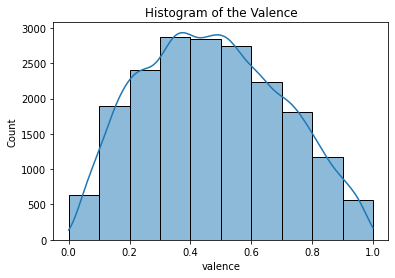

In [23]:
#Creates a Histogram of the valence
sns.histplot(x='valence', data=Final, kde=True, bins=10).set(title='Histogram of the Valence')

* Excluding the songs that last more than 8 minutes we can also observe that most songs last 2-5 minutes. 
* We barely meet songs that last more than 8 minutes and that's why we select not visualize those tracks.

<AxesSubplot:xlabel='duration_ms', ylabel='Count'>

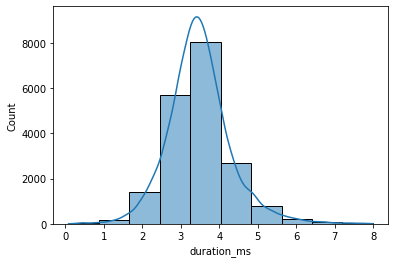

In [24]:
#Select songs that last less than 8 minutes 
Duration=Final[Final['duration_ms']<=8]
#Plots the histogram
sns.histplot(x='duration_ms', data=Duration, kde=True, bins=10)

* In the graph below we can see the density of the valence based on the `mode` of a track. 
 

<Figure size 1152x720 with 0 Axes>

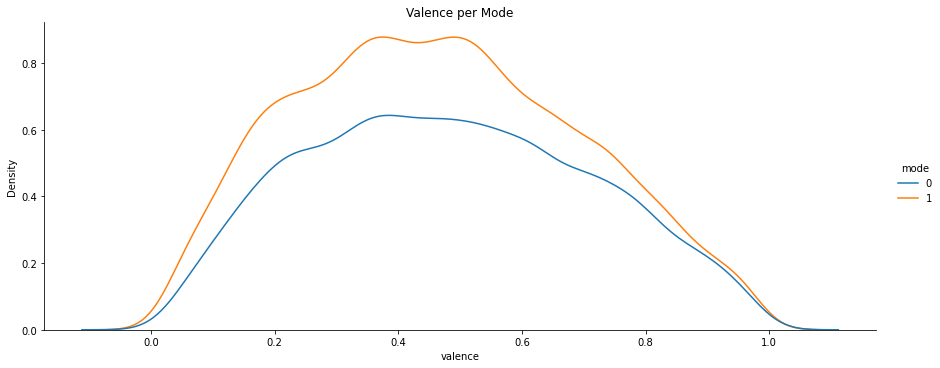

In [25]:
plt.figure(figsize=(16, 10))
sns.displot(x="valence", data=Final, hue="mode", aspect=2.5, kind="kde").set(title='Valence per Mode')

## 2.2 Data Associations - Correlations
---

We will examine both `pearson` and `spearman` correlation. We can note the following: 
 


* As we can observe from the heatmap below, `valence` have a medium **positive** linear relationship with `danceability`, `energy` and `loudness`.
* On the other hand, `valence` have a medium linear **negative** relationship with `acousticness` and `instrumentalness`.

* The variables "loudness" and "energy" have a strong positive linear relationship, indicating that it is important to check for multicollinearity.
* A strong negative linear relationship is observed between "energy" and "acousticness".


Text(0.5, 1.0, 'Pearson Correlation')

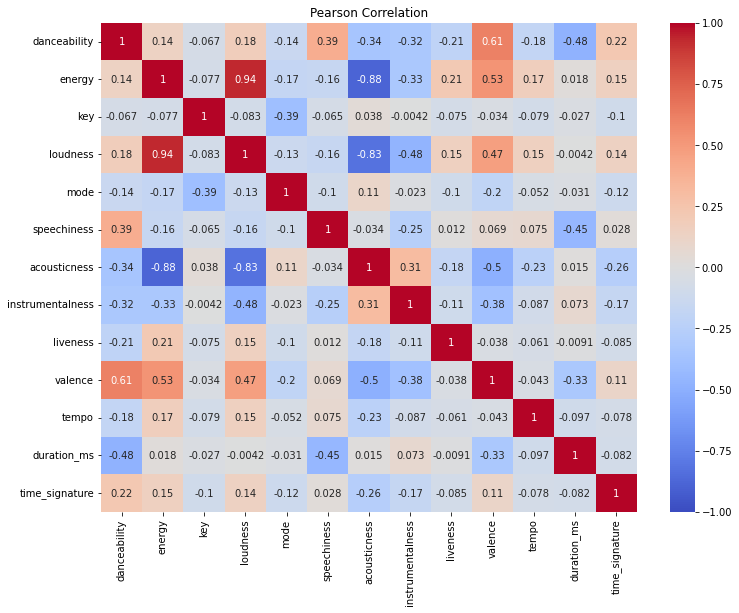

In [26]:
#Calculates and prints the Correlation heatmap using Pearson correlation
r_pearson = Final.corr(method="pearson")
plt.figure(figsize=(12,9))
sns.heatmap(r_pearson.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.title("Pearson Correlation")

This correlation heatmap is similar to the one above, with the only difference that the previous one would use the Pearson Coefficient that can detect linear relationships, while this one uses the `Spearman` coefficient that can capture non-linear relationships too. 
* By comparing them, we can see that there are **no significant differences** between them, so the second heatmap is not that useful, as there were no new important non-linear relationships discovered.

Text(0.5, 1.0, 'Spearman Correlation')

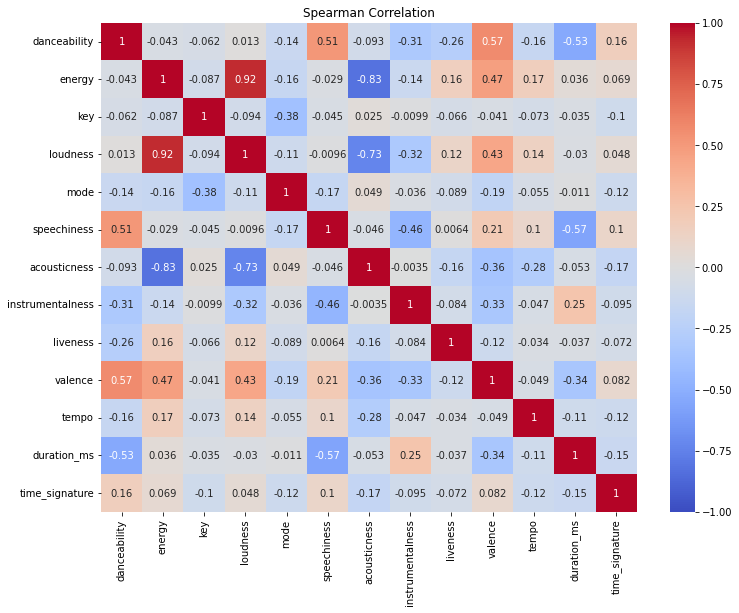

In [27]:
#Calculates and prints the Correlation heatmap using Spearman correlation
r_spearman = Final.corr(method="spearman")
plt.figure(figsize=(12,9))
sns.heatmap(r_spearman.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.title("Spearman Correlation")

## 2.3 Linear Regression Model
---

For the first attemp we tried to fit the `Full model`, meaning the model that includes all the attributes of the dataset in order to explain the Valence of the songs.

### Full Model 



From the Summary table below we can see: 
* `Adj.R-squared` is equal to `0.290` meaning that 29% of the variance in valence is explained by the model.
* Variables `mode`, `liveness` and `time_signature` are not significantly important for the model as the `p-value` is higher than 5% level of significance.
 

In [28]:
import statsmodels.formula.api as smf

all_columns = list(Final.columns)
all_columns.remove('valence')

formula = 'valence' + " ~ " + '+'.join(all_columns)

mod = smf.ols(formula=formula, data=Final)
regr = mod.fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     653.8
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:52:35   Log-Likelihood:                 4617.4
No. Observations:               19172   AIC:                            -9209.
Df Residuals:                   19159   BIC:                            -9107.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4009      0.024    -16.516      0.000      -0.448      -0.353
danceability         0.6115      0.010     58.932      0.000       0.591       0.632
energy               0.6386      0.012     51.342      0.000       0.614       0.663
key                  0.0026      0.000      6.669      0.000       0.002       0.003
loudness            -0.0104      0.001    -14.051      0.000      -0.012      -0.009
mode                -0.0003      0.003     -0.118      0.906      -0.006       0.005
speechiness         -0.0874      0.013     -6.881      0.000      -0.112      -0.062
acousticness         0.1294      0.007     17.869      0.000       0.115       0.144
instrumentalness    -0.1366      0.010    -13.146      0.000      -0.157      -0.116
liveness             0.0088      0.010      0.902      0.367      -0.010       0.028
tempo                0.0002   4.97e-05      4.205      0.000       0.000       0.000
duration_ms         -0.0147      0.002     -9.016      0.000      -0.018      -0.012
time_signature      -0.0021      0.005     -0.476      0.634      -0.011       0.007
==============================================================================
Omnibus:                      170.714   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.213
Skew:                           0.023   Prob(JB):                     4.30e-25
Kurtosis:                       2.628   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
As the explanatory ability of the full model is quite low, we are going to evaluate the variables the model contains. 
* Variables that are not important for the model can cause `noise`. 
* Therefore, the examination of the `features importance` is necessary.

### Feature Importance




* The aim of this analysis is to interpret the data. 
* Therefore, methods recommended for such analysis are `backward looking stepwise methods`. 
* In the lines below we will execute a backward looking variable selection

In [29]:
def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].values
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr


In [30]:
def backward_remove_variable(data, exog, selected):
    
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]
    
    for column in selected:
        new_selected = selected[:]
        new_selected.remove(column)
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column
    
    return best_model, best_column

In [31]:
def backward_stepwise_selection(data, exog):

    best_models = []
    selected = [ x for x in data.columns if x != exog ]

    p = len(selected) + 1

    print(f'Finding the best model for {p - 1} variables')
    print(selected)
    y = data.loc[:, exog]
    best_model = process_subset(y, data, selected)
    best_models.append(best_model)

    for i in reversed(range(2, p)):
        print(f'Finding the best model for {i - 1} variable{"s" if (i - 1) > 1 else ""}')
        model, best_column = backward_remove_variable(data, exog, selected)
        selected.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected)
        best_models.append(model)
        
    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

* Below we can see the best models for different number of attributes. 
* The `best selected model` is the one with `10 variables`. 

In [32]:
best_model, best_models = backward_stepwise_selection(Final, 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 12 variables
['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature']
Finding the best model for 11 variables
['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature']
Finding the best model for 10 variables
['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']
Finding the best model for 9 variables
['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'tempo', 'duration_ms']
Finding the best model for 8 variables
['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'duration_ms']
Finding the best model for 7 variables
['danceability', 'energy', 'key', 'loudness', 'acousticness', 'instrumentalness', 'dura

### Model Selection Plot

This is also clear from the `plot` below where we can see that the highest R square metric is achieved at 10 variables.

In [33]:
def plot_model_selection(models, best_model, reverse=False):
    if reverse:
        models = models[::-1]
    all_rsquared = np.array([ x.rsquared  for x in models ])
    all_rsquared_adj = np.array([ x.rsquared_adj  for x in models ])
    best_indx =len(best_model.model.exog_names)
    print(best_indx)
    x = np.arange(1, len(all_rsquared)+1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, all_rsquared, marker='*', label='$R^2$')
    plt.plot(x, all_rsquared_adj, marker='o', label='Adjusted $R^2$')
    plt.plot(best_indx, all_rsquared_adj[best_indx], marker='x', markersize=14, color='k')
    plt.legend()

10


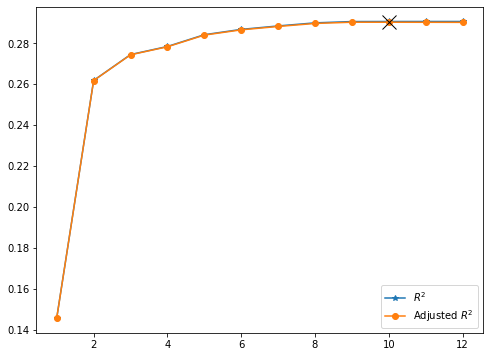

In [34]:
plot_model_selection(best_models, best_model, reverse=True)

### Best Model

From the Summary table below for the best model we can see: 
* `Adj.R-squared` is equal to `0.290` meaning that 29% of the variance in valence is explained by the model.
* We observe that the $R^2$ metric have not been ameliorated.
* However, we lowered the dimension of the model and thats also very important. 
 

In [35]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     871.7
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:52:38   Log-Likelihood:                 4616.8
No. Observations:               19172   AIC:                            -9214.
Df Residuals:                   19162   BIC:                            -9135.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -0.4076      0.018    -23.282      0.000      -0.442      -0.373
danceability         0.6098      0.010     59.635      0.000       0.590       0.630
energy               0.6398      0.012     51.992      0.000       0.616       0.664
key                  0.0026      0.000      6.790      0.000       0.002       0.003
loudness            -0.0104      0.001    -14.079      0.000      -0.012      -0.009
speechiness         -0.0863      0.013     -6.838      0.000      -0.111      -0.062
acousticness         0.1295      0.007     17.900      0.000       0.115       0.144
instrumentalness    -0.1366      0.010    -13.152      0.000      -0.157      -0.116
tempo                0.0002   4.96e-05      4.166      0.000       0.000       0.000
duration_ms         -0.0147      0.002     -9.041      0.000      -0.018      -0.012
==============================================================================
Omnibus:                      171.259   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.487
Skew:                           0.023   Prob(JB):                     3.75e-25
Kurtosis:                       2.627   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check for Multicollinearity (VIF test )

* From the correlation section we observed high associations between some variables. Therefore, it is important to check for `multicollinearity` into our final model. 
* We can assume that a variable is collinear with another if the score in the `VIF test` exceeds 10. 
* Luckily, no multicollinearity is observed.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#X contains all attributes except Valence
X = add_constant(Final.drop(['valence'], axis=1))
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns)

C:\Users\Maria Skoli\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


const               312.128993
danceability          1.218312
energy                2.600489
key                   1.030009
loudness              2.314225
mode                  1.034268
speechiness           1.138871
acousticness          1.577958
instrumentalness      1.111581
liveness              1.052140
tempo                 1.053280
duration_ms           1.075687
time_signature        1.034255
dtype: float64

## 2.4 Model Interpretation 

* The best model can be written as following: 

$Valence = -0,40 + 0,6*danceability +0,64*energy + 0,003*key -0,01*loudness-0,09*speechiness +0,13 * accousticness  -0,14*instrumentalness + 0,0002* tempo -0,015*duration$

* Consequently, the attributes that influence **positively** the Valence of a song are mainly the danceability, the energy and the accousticness. 

* On the other hand, the attributes that influence **negatively** the Valence of a song are mainly the instrumentalness, the speechiness and the duration. 

---
# Section 3: Predictive Models
---

In this section we are going to examine 3 different Machine Learning methods `Linear Regression`, `Decision Trees` and `XGBoost` in order to predict the `Valence` of a given track. 
* We will train all models and we compare them based on the `Mean Absolute Error`. 
* At the end we will examine the predictive ability of the best model on a `test` dataset. 

In [37]:
# pip install xgboost

In [38]:
# pip install lightgbm

In [39]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split

## 3.1 Split the Dataset into Train & Test 
---

We selected to split the dataset into training *(70% of the initial dataset)* and test *(30% of the initial dataset)*. 

In [40]:
#Splits into Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(Final.drop(['valence'] , axis=1), 
                                                    Final['valence'], test_size = 0.3, random_state = 12345)

## 3.2  Linear Regression 
---

The first machine learning method that we used is the `Linear Regression model` we have created earlier for interpretation. 

In [41]:
x_tr=X_train.drop(['mode','liveness'], axis =1)
x_ts=X_test.drop(['mode','liveness'], axis =1)

In [42]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x_tr, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_ts)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [0.46437522 0.64697461 0.46418283 ... 0.45603146 0.17525321 0.56490319]


* As we can easily observe from the dataframe below, sometimes the predicted value is far away from the actual one. 
* However, for some tracks the predictions are very close to the reality. 

In [43]:
#Creates a dataframe with the actual and the predicted value of the Valence
regmodel_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
regmodel_diff

,Actual value,Predicted value
17793,0.280,0.464375
7541,0.710,0.646975
9367,0.376,0.464183
11406,0.820,0.654976
6042,0.871,0.665242
...,...,...
17796,0.463,0.414344
4658,0.595,0.754554
7944,0.537,0.456031
12435,0.313,0.175253


In [44]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [ 6.09742768e-01  6.47211542e-01  2.45746769e-03 -1.07994470e-02
 -9.20134922e-02  1.29143254e-01 -1.41345698e-01  2.34533913e-04
 -1.61228835e-02  1.50635426e-03]
Mean squared error: 0.04
Coefficient of determination: 0.28


The plot of the `residuals` indicates the existance of an association between the data which leads to heteroscedasticity. 


Coefficients:  [ 6.09965530e-01  6.45678685e-01  2.38016854e-03 -1.07766906e-02
 -3.34076679e-03 -9.30450504e-02  1.29099891e-01 -1.41353370e-01
  5.54283502e-03  2.36899484e-04 -1.61594639e-02  1.43064824e-03]
Variance score: 0.27796599209353434


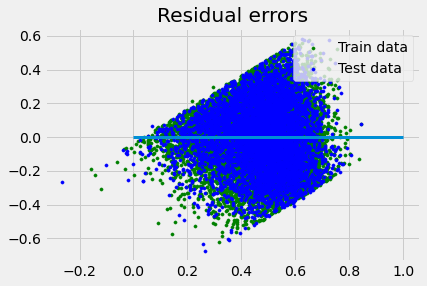

In [45]:
reg = LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 1, linewidth = 3)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

### Model Evaluation
---

* The `Linear Regression model` results in a `MAE` of `0.157`. 

In [46]:
#Model Evaluation
from sklearn import metrics
mae1 = metrics.mean_absolute_error(y_test, y_pred).round(3)
mse1 = metrics.mean_squared_error(y_test, y_pred).round(3)


In [47]:
#Prints the metrics results
print('Mean Absolute Error:', mae1)
print('Mean Square Error:', mse1)


Mean Absolute Error: 0.157
Mean Square Error: 0.037


## 3.3 Decision Tree Regressor Model 
---


* The second machine learning method that we used is the `Decision Tree`. 

In [48]:
decision_tree = DecisionTreeRegressor(max_depth=20, min_samples_leaf = 500)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
mse2 = round(mean_squared_error(y_test, y_pred_tree),4)
mae2 = round(mean_absolute_error(y_test, y_pred_tree),4)
print('Mean Squared Error: ', mse2 , " \nMean Absolute Error:", mae2)

Mean Squared Error:  0.0382  
Mean Absolute Error: 0.1595


* Below we can see a graphical representation of the nodes of the tree.

In [49]:
 from sklearn.tree import export_text
features_names = list(X_train.columns)
print(export_text(decision_tree, feature_names=features_names))

|--- danceability <= 0.60
|   |--- energy <= 0.62
|   |   |--- danceability <= 0.49
|   |   |   |--- value: [0.24]
|   |   |--- danceability >  0.49
|   |   |   |--- duration_ms <= 3.54
|   |   |   |   |--- value: [0.36]
|   |   |   |--- duration_ms >  3.54
|   |   |   |   |--- value: [0.29]
|   |--- energy >  0.62
|   |   |--- danceability <= 0.52
|   |   |   |--- duration_ms <= 3.57
|   |   |   |   |--- value: [0.42]
|   |   |   |--- duration_ms >  3.57
|   |   |   |   |--- value: [0.35]
|   |   |--- danceability >  0.52
|   |   |   |--- energy <= 0.73
|   |   |   |   |--- value: [0.41]
|   |   |   |--- energy >  0.73
|   |   |   |   |--- tempo <= 128.02
|   |   |   |   |   |--- value: [0.47]
|   |   |   |   |--- tempo >  128.02
|   |   |   |   |   |--- value: [0.53]
|--- danceability >  0.60
|   |--- energy <= 0.66
|   |   |--- danceability <= 0.68
|   |   |   |--- energy <= 0.52
|   |   |   |   |--- value: [0.36]
|   |   |   |--- energy >  0.52
|   |   |   |   |--- value: [0.42]
| 

## Hyperparameters: 

* One hyperparameter we need to examine is the `maximum depth` of the tree, which controls the overall complexity of the tree. 
* To find the best depth we used the `GridSearchCV` library. 
* We found that the best max_depth is `6`. 

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = [
  {'max_depth': list(range(1, 20))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=6)
{'max_depth': 6}


* The split point is selected based on the `mean squared error`. 
* The value attribute of each node is the predicted value for the subset in the node. 
* Therefore, we can plot the result of the regression tree, by predicting the value for the set of possible x values. 


### Model Evaluation

* Now we can run a tree with `max_depth = 6` and visualize the result. 
* With the parameter `min_samples_leaf` we define the number of the minimun observation that the last node should contain. 

In [51]:
decision_tree = DecisionTreeRegressor(max_depth=6, min_samples_leaf = 250)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
mse2 = round(mean_squared_error(y_test, y_pred_tree),4)
mae2 = round(mean_absolute_error(y_test, y_pred_tree),4)
print('Mean Squared Error: ', mse2 , " \nMean Absolute Error:", mae2)

Mean Squared Error:  0.0376  
Mean Absolute Error: 0.1575


* This method results in a `MAE` of `0,1575`.
* Below we can have a look of a graphical representation of the predictions.

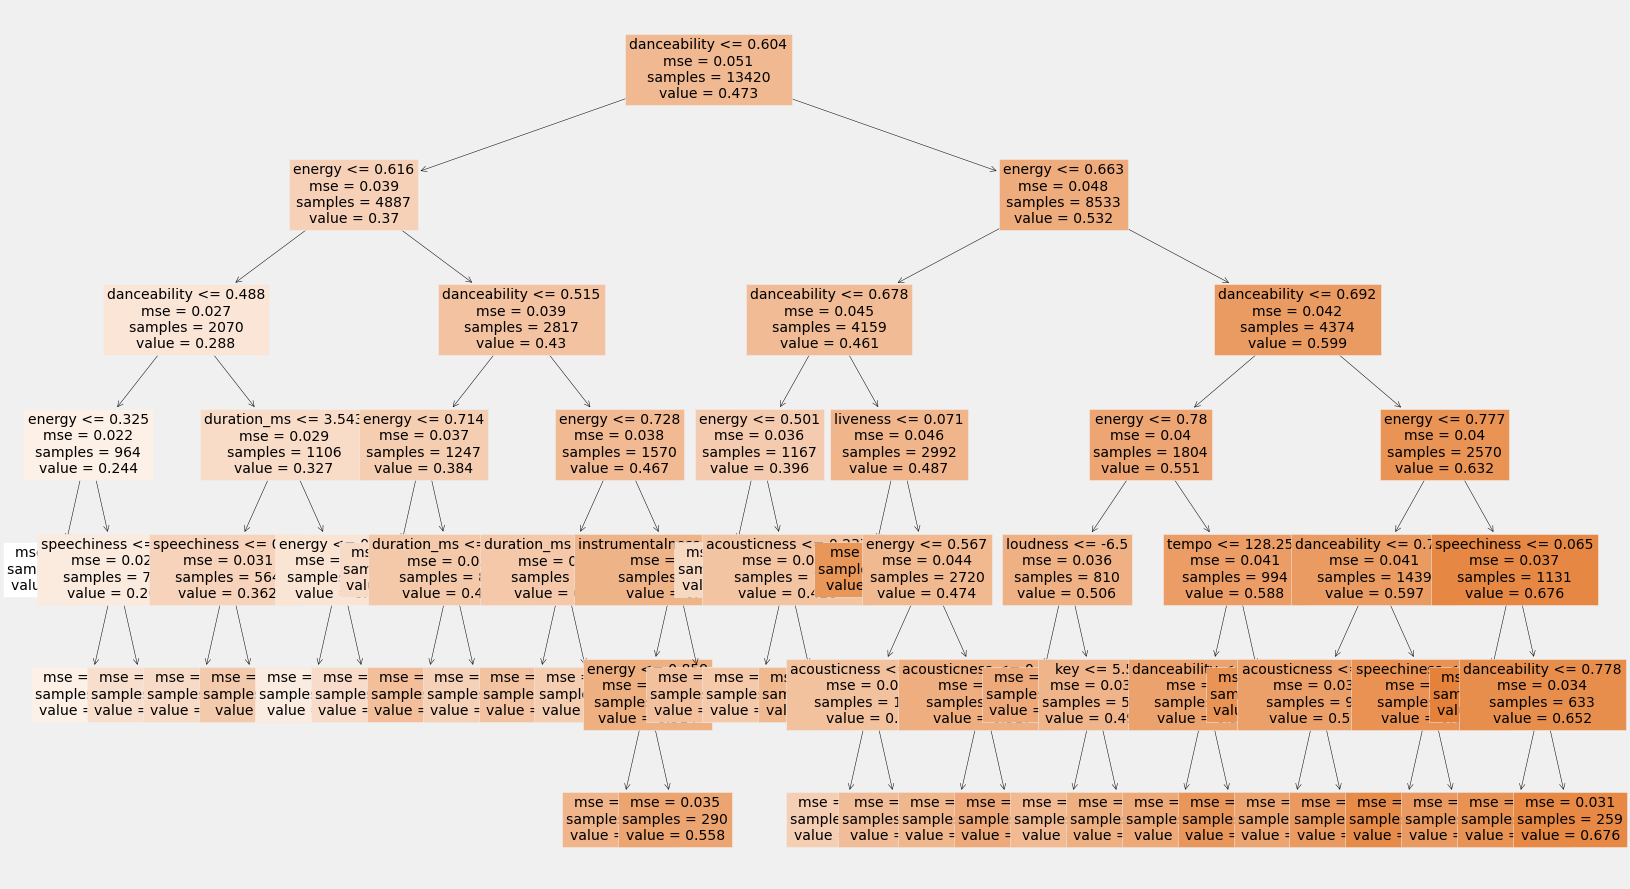

In [52]:
#Plotting the Decision Tree 
from sklearn import tree
plt.figure(figsize=(25,15))
_=tree.plot_tree(decision_tree, feature_names=X_train.columns,filled=True, fontsize=14)

## 3.4 XGBoost Regressor Model
---

* The third and final method we used is the `XGBoost Regressor Model`. 


## Hyperparameters:

* To run XGBoost we build an XGBRegressor who by default will create `100 trees`. 
* Like the Decision tree we run before we want the max depth to be 6, so we will use the default. 


In [53]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [54]:
preds = xgb_reg.predict(X_test)
preds

array([0.4200989 , 0.64415735, 0.33770442, ..., 0.35148388, 0.21625493,
       0.55465037], dtype=float32)

### Model Evaluation 

* Using the XGBoost Regressor the `MAE` is `0,146`.

In [55]:
mae3=round(mean_absolute_error(y_test, preds),3)
print('Mean Absolute Error:', mae3)

Mean Absolute Error: 0.146


## 3.5 Summary Results - Models Comparison
---


Below we can see a summary of the three models and their corresponding MAE. 

In [56]:
models_summary = [
['Linear Regression', mae1], 
['Decision Tree', mae2], 
['XGBoost',mae3]
]

models_summary_df = pd.DataFrame(models_summary)
models_summary_df.columns = ['Model:','MAE:']
models_summary_df

,Model:,MAE:
0,Linear Regression,0.1570
1,Decision Tree,0.1575
2,XGBoost,0.1460


From the `plot` below we can easily notice that the model that performs better on a test dataset is the `XGBoost model`as it has the lowest MAE. 

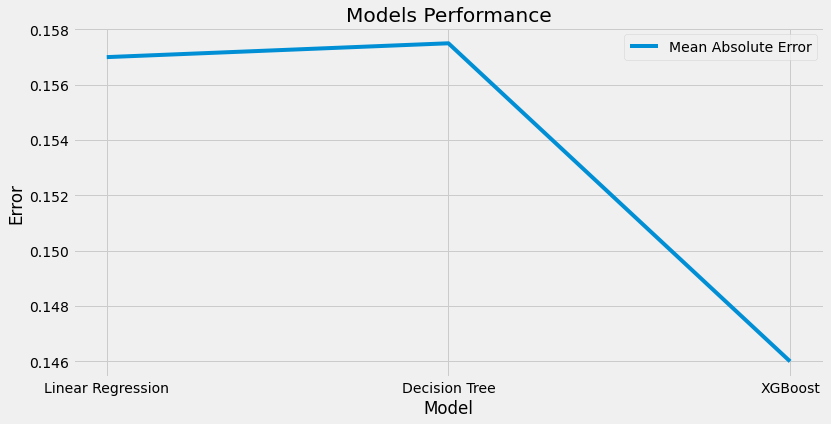

In [57]:
# Dataframe Results and Plotting
data = {'Model': ['Linear Regression', 'Decision Tree', 'XGBoost'],
       'Mean Absolute Error': [mae1,mae2,mae3]} 
results = pd.DataFrame(data)
ax = results.plot(figsize=(12, 6),title = "Models Performance")
ax.set(xlabel="Model",ylabel='Error')
ax.set_xticks(results.index)
ax.set_xticklabels(results.Model)
plt.show()


## 3.6 Feature Importance

* As we imagined the most important features to describe the Valence metric are: `Danceability`, `energy`, `loudness` and `Tempo`.
* Lower in the hierarchy we found the attributes of `time signature` and `mode`. 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

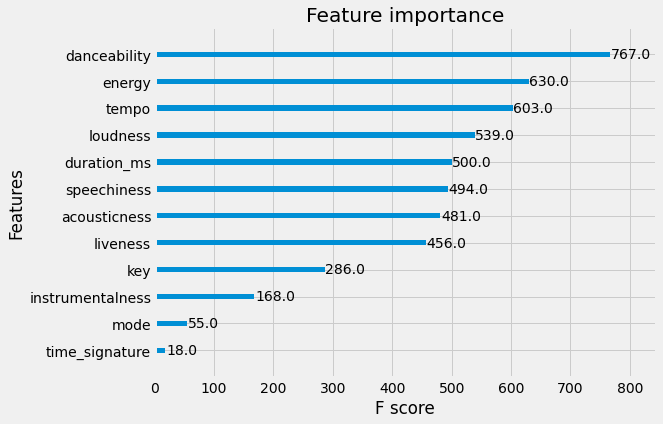

In [58]:
fig = plt.figure(figsize=(8, 6))
xgb_reg.get_booster().feature_names = list(X_train.columns)
xgb.plot_importance(xgb_reg, ax = fig.gca())

---
# Section 4:  Out of Sample predictability
---

In this part we will check the predictive ability of the `XGBoost model` on a `Test Dataset` given to us. 

## 4.1 Import the Test Dataset 
---

* The test txt file contains only the ids of the tracks. 
* So, we need to follow the same procedure of the Section 1 to retrieve the feature data of the tracks.

In [59]:
#Imports the test dataset with the ids of almost 1600 tracks. 
main_dataset="./spotify_ids.txt"


In [60]:
#Loads the datat into a list 
import numpy as py
tidss = py.loadtxt('spotify_ids.txt', dtype='object')

In [61]:
features_test = {}

start = 0
num_tracks = 100
while start < len(tidss):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = tidss[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features_test.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks


getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200


In [62]:
#Check that all songs are here.
len(features_test)

1162

## 4.2 Test Dataset Cleaning
---

It is needed for continue with the analysis to transform the test dataset to the same format as te train dataset we have analysed in the previous sections. 
* We must follow the process we conducted on our initial dataset

In [63]:
df_t = pd.DataFrame(features_test)
df_t2=df_t.swapaxes("index", "columns")
df_test=df_t2.reset_index()
df_test=df_test.rename(columns={'index': "Song_id"})
#df_test

In [64]:
df_test=df_test.drop_duplicates()
df_test=df_test.dropna()
#df_test

In [65]:
Test_Dataset=df_test.drop(['Song_id','type','id','uri','track_href', 'analysis_url'], axis=1)
Test_Dataset

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.585,0.436,10,-8.761,1,0.0601,0.721,0.000013,0.105,0.132,143.874,242014,4
1,0.68,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,215627,4
2,0.514,0.73,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4
3,0.731,0.573,4,-10.059,0,0.0544,0.401,0.000052,0.113,0.145,109.928,205090,4
4,0.907,0.393,4,-7.636,0,0.0539,0.451,0.000001,0.135,0.202,104.949,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.596,0.65,9,-5.167,1,0.337,0.138,0,0.14,0.188,133.997,257428,4
1158,0.588,0.85,4,-6.431,1,0.0318,0.168,0.00202,0.0465,0.768,93.003,187310,4
1159,0.754,0.66,0,-6.811,1,0.267,0.179,0,0.194,0.316,83.0,209299,4
1160,0.584,0.836,0,-4.925,1,0.079,0.0558,0,0.0663,0.484,104.973,202204,4


In [66]:
Test_Dataset["danceability"]=pd.to_numeric(Test_Dataset["danceability"],  errors= 'coerce')
Test_Dataset["energy"]=pd.to_numeric(Test_Dataset["energy"],  errors= 'coerce')
Test_Dataset["loudness"]=pd.to_numeric(Test_Dataset["loudness"],  errors= 'coerce')
Test_Dataset["mode"]=pd.to_numeric(Test_Dataset["mode"],  errors= 'coerce')
Test_Dataset["speechiness"]=pd.to_numeric(Test_Dataset["speechiness"],  errors= 'coerce')
Test_Dataset["acousticness"]=pd.to_numeric(Test_Dataset["acousticness"],  errors= 'coerce')
Test_Dataset["instrumentalness"]=pd.to_numeric(Test_Dataset["instrumentalness"],  errors= 'coerce')
Test_Dataset["liveness"]=pd.to_numeric(Test_Dataset["liveness"],  errors= 'coerce')
Test_Dataset["valence"]=pd.to_numeric(Test_Dataset["valence"],  errors= 'coerce')
Test_Dataset["tempo"]=pd.to_numeric(Test_Dataset["tempo"],  errors= 'coerce')
Test_Dataset["duration_ms"]=pd.to_numeric(Test_Dataset["duration_ms"],  errors= 'coerce')
Test_Dataset["time_signature"]=pd.to_numeric(Test_Dataset["time_signature"],  errors= 'coerce')
Test_Dataset["key"]=pd.to_numeric(Test_Dataset["key"],  errors= 'coerce')

In [67]:
Test_Dataset["duration_ms"] = Test_Dataset["duration_ms"]/60000
Test_Dataset

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4.033567,4
1,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,3.593783,4
2,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,3.334000,4
3,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,3.418167,4
4,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,3.424300,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,4.290467,4
1158,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,3.121833,4
1159,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,3.488317,4
1160,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,3.370067,4


In [68]:
Test_Dataset=Test_Dataset.round(decimals=3)
Test_Dataset

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.585,0.436,10,-8.761,1,0.060,0.721,0.000,0.105,0.132,143.874,4.034,4
1,0.680,0.826,0,-5.487,1,0.031,0.021,0.000,0.543,0.644,118.051,3.594,4
2,0.514,0.730,1,-5.934,1,0.060,0.001,0.000,0.090,0.334,171.005,3.334,4
3,0.731,0.573,4,-10.059,0,0.054,0.401,0.000,0.113,0.145,109.928,3.418,4
4,0.907,0.393,4,-7.636,0,0.054,0.451,0.000,0.135,0.202,104.949,3.424,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.596,0.650,9,-5.167,1,0.337,0.138,0.000,0.140,0.188,133.997,4.290,4
1158,0.588,0.850,4,-6.431,1,0.032,0.168,0.002,0.046,0.768,93.003,3.122,4
1159,0.754,0.660,0,-6.811,1,0.267,0.179,0.000,0.194,0.316,83.000,3.488,4
1160,0.584,0.836,0,-4.925,1,0.079,0.056,0.000,0.066,0.484,104.973,3.370,4


## 4.3 Prediction 
---

For the prediction we will use: 
* The `XGBoost Regressor` (because it was the model with the best MAE).
* The `Final` dataset (initial dataset of 20K rows) for training the model.
* The `Test Dataset` for evaluate the model. 

In [69]:
#Define the Train and Test Dataset
X_train2 = Final.drop(['valence'], axis=1)
X_test2 = Test_Dataset.drop(['valence'], axis=1)
y_train2 = Final['valence']
y_test2= Test_Dataset['valence']

In [70]:
xgb_reg_final = xgb.XGBRegressor()
xgb_reg_final.fit(X_train2, y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [71]:
preds2 = xgb_reg_final.predict(X_test2)

#Creates a dataframe with the actual and the predicted value of the Valence
XGBmodel_diff = pd.DataFrame({'Actual value': y_test2, 'Predicted value': preds2})
XGBmodel_diff

,Actual value,Predicted value
0,0.132,0.213774
1,0.644,0.577013
2,0.334,0.393354
3,0.145,0.369084
4,0.202,0.439328
...,...,...
1157,0.188,0.378319
1158,0.768,0.652750
1159,0.316,0.570271
1160,0.484,0.523791


## Conclusion

We conclude that using the XGBoost model we end up with `Mean Absolute Error` equal to `0.126`.

In [72]:
MAE=round(mean_absolute_error(y_test2, preds2),4)
print('Final Mean Absolute Error for the Test Dataset:', MAE)

Final Mean Absolute Error for the Test Dataset: 0.1264
